# Gradient Descent

gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [134]:
import numpy as np
import matplotlib.pyplot as plt

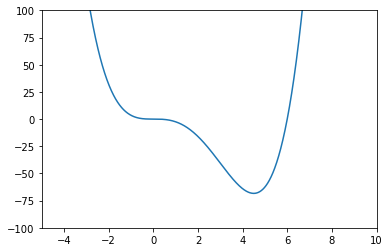

In [135]:
x =np.arange(-10,10,0.01)

def f(x):
    return 0.5*(x**4)-3*(x**3)

plt.ylim(-100,100)
plt.xlim(-5,10)

plt.plot(x,f(x))

In [136]:
x = 5
x_old = 7
eps = 0.01
precision = 0.00000001

def fp(x):
    return 2*(x**3)-9*(x**2)

In [137]:
while (abs(x-x_old)>precision):
    x_old = x
    x= x_old - eps*fp(x_old)
    
x

4.500000012691155

# Diabetes (regression)

다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)
2. sklearn을 이용해서

In [138]:
from sklearn import datasets

In [139]:
diabetes=datasets.load_diabetes()

In [140]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [141]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [142]:
X_age=diabetes.data[:,0]
X_bmi=diabetes.data[:,2]
X_p=diabetes.data[:,3]
Y=diabetes.target

In [143]:
X_age

array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306,
       -0.09269548, -0.04547248,  0.06350368,  0.04170844, -0.07090025,
       -0.09632802,  0.02717829,  0.01628068,  0.00538306,  0.04534098,
       -0.05273755, -0.00551455,  0.07076875, -0.0382074 , -0.02730979,
       -0.04910502, -0.0854304 , -0.0854304 ,  0.04534098, -0.06363517,
       -0.06726771, -0.10722563, -0.02367725,  0.05260606,  0.06713621,
       -0.06000263, -0.02367725,  0.03444337,  0.03081083,  0.01628068,
        0.04897352,  0.01264814, -0.00914709, -0.00188202, -0.00188202,
        0.00538306, -0.09996055, -0.06000263,  0.01991321,  0.04534098,
        0.02717829, -0.05637009, -0.07816532,  0.06713621, -0.04183994,
        0.03444337,  0.05987114, -0.05273755, -0.00914709, -0.04910502,
       -0.04183994, -0.04183994, -0.02730979,  0.04170844,  0.06350368,
       -0.07090025, -0.04183994, -0.02730979, -0.03457486,  0.06713621,
       -0.04547248, -0.00914709,  0.04170844,  0.03807591,  0.01

In [144]:
X_bmi

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [145]:
X_p

array([ 2.18723550e-02, -2.63278347e-02, -5.67061055e-03, -3.66564468e-02,
        2.18723550e-02, -1.94420933e-02, -1.59992226e-02,  6.66296740e-02,
       -4.00993175e-02, -3.32135761e-02,  8.10087222e-03, -3.32135761e-02,
       -9.11348125e-03,  8.10087222e-03, -1.25563519e-02,  8.04011568e-02,
        4.94153205e-02,  5.63010619e-02, -3.66564468e-02, -4.00993175e-02,
       -4.35421882e-02,  1.21513083e-03, -9.11348125e-03,  3.10533436e-02,
       -2.28849640e-02, -4.00993175e-02, -2.63278347e-02, -4.00993175e-02,
       -7.45280244e-02,  6.31868033e-02, -1.94420933e-02, -8.14137658e-02,
        2.87580964e-02, -2.22773986e-03, -5.73136710e-02, -4.92803060e-02,
        5.28581912e-02, -5.73136710e-02,  9.76155103e-02, -7.45280244e-02,
        2.18723550e-02, -1.08956731e-01, -1.48515991e-02, -7.10851537e-02,
        8.10087222e-03,  3.22009671e-02, -3.32135761e-02, -5.73136710e-02,
        1.15437429e-02, -5.67061055e-03,  1.49866136e-02,  2.87580964e-02,
       -5.67061055e-03,  

In [146]:
import matplotlib.pyplot as plt
import numpy as np

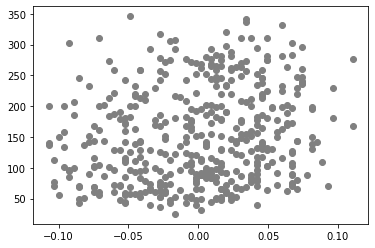

In [147]:
plt.plot(X_age,Y,'o',color='gray')

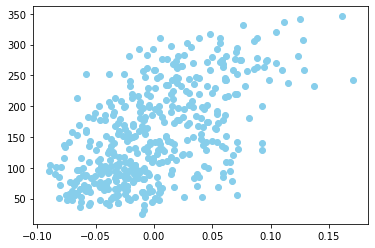

In [148]:
plt.plot(X_bmi,Y,'o',color='skyblue')

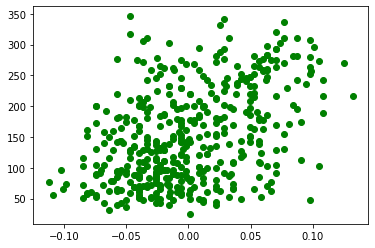

In [149]:
plt.plot(X_p,Y,'o',color='green')

In [150]:
def f1(a,d1,Xi_age):
    return a*Xi_age+d1

def mse1(a,d1,Y):
    Y_hat1=d1+(a*X_age)
    return np.mean((Y_hat1-Y)**2)


In [151]:
eps=0.00001
n=0;
a=0.1;d1=0

while(n<100000):
    if(mse1(a+eps,d1,Y)>mse1(a-eps,d1,Y)):
        a=a-eps
    else:
        a=a+eps
            
    if(mse1(a,d1+eps,Y)>mse1(a,d1-eps,Y)):
        d1=d1-eps
    else:
        d1=d1+eps
        
    n=n+1

In [152]:
a,d1

(1.0999999999987449, 0.9999999999980838)

In [123]:
def f2(b,d2,Xi_bmi):
    return b*Xi_bmi+d2

def mse2(b,d2,Y):
    Y_hat2=d2+(a*X_bmi)
    return np.mean((Y_hat2-Y)**2)

In [124]:
eps=0.00001
n=0;
b=1;d2=0

while(n<100000):
    if(mse2(b+eps,d2,Y)>mse1(b-eps,d2,Y)):
        b=b-eps
    else:
        b=b+eps
            
    if(mse2(b,d2+eps,Y)>mse2(b,d2-eps,Y)):
        d2=d2-eps
    else:
        d2=d2+eps
        
    n=n+1

In [125]:
b,d2

(2.000000000006551, 0.9999999999980838)

In [126]:
def f3(c,d3,Xi_p):
    return c*Xi_p+d3

def mse3(c,d3,Y):
    Y_hat3=d3+(c*X_p)
    return np.mean((Y_hat3-Y)**2)

In [127]:
eps=0.00001
n=0;
c=1;d3=0

while(n<100000):
    if(mse3(c+eps,d3,Y)>mse3(c-eps,d3,Y)):
        c=c-eps
    else:
        c=c+eps
            
    if(mse3(c,d3+eps,Y)>mse3(c,d3-eps,Y)):
        d3=d3-eps
    else:
        d3=d3+eps
        
    n=n+1

In [128]:
c,d3

(2.000000000006551, 0.9999999999980838)

In [129]:
d=d1+d2+d3

In [130]:
a,b,c,d

(1.0999999999987449, 2.000000000006551, 2.000000000006551, 2.9999999999942513)